<a href="https://colab.research.google.com/github/HebahAlshamlan/Covid-19/blob/master/Covid_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset :
Covid-19 : https://github.com/ieee8023/covid-chestxray-dataset
Normal : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/data#

Libraries 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from tqdm import tqdm


In [0]:
DATADIR = "dataset"

CATEGORIES = ["Covid", "NotCovid"] 

Covid auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg 



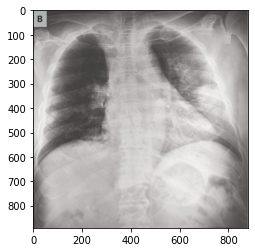

NotCovid IM-0240-0001.jpeg 



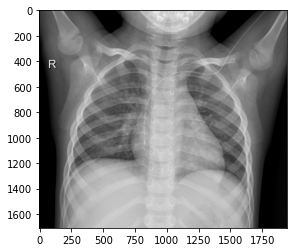

In [11]:
# Just for test
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):  
        print(category,img, "\n") 
        img_array = cv2.imread(os.path.join(path,img)) 
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        break
    

# Creat the Dataset



In [14]:
dataSet = []
IMG_SIZE = 224

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        print(path)
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Covid+ 1=Covid-
        print(class_num)
        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                dataSet.append([new_array, class_num])  # add this to our dataset
            except Exception as e:  # in the interest in keeping the output clean...
            #except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(dataSet))

  5%|▌         | 3/57 [00:00<00:01, 27.06it/s]

dataset/Covid
0


  9%|▉         | 5/57 [00:00<00:01, 42.19it/s]

dataset/NotCovid
1


100%|██████████| 57/57 [00:01<00:00, 45.12it/s]

114


In [15]:
len(dataSet)

114

In [0]:
import random

random.shuffle(dataSet)

In [54]:
for sample in dataSet[:10]:
    print(sample[1])

0
1
0
1
1
0
0
1
0
1


In [0]:

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images

X = []
y = []

for features,label in dataSet:
  features = cv2.resize(features, (224, 224))
  X.append(features)
  y.append(label)
  # y = np.array(label)





# X = np.array(X).reshape(IMG_SIZE, IMG_SIZE)  / 255.0
# # X = np.array(X) / 255.0
# y = np.array(y)
# # X = X/255.0




In [0]:
X = np.array(X) / 255.0
y = np.array(y)
# X = X/255.0


### Create the *Training* and *Validation* datasets

---



In [0]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.20, stratify=y, random_state=42)


In [21]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1])

In [22]:
trainY

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0])

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Model settings

In [0]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [37]:
INIT_LR = 1e-3
EPOCHS = 25
BS = 8


model = Sequential()


model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))



opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])



history1 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)


Epoch 1/25
11/11 [==============================] - 82s 7s/step - loss: 10.8052 - acc: 0.6506 - val_loss: 0.5576 - val_acc: 0.6957
Epoch 2/25
11/11 [==============================] - 81s 7s/step - loss: 0.8068 - acc: 0.6506 - val_loss: 0.2072 - val_acc: 0.9565
Epoch 3/25
11/11 [==============================] - 85s 8s/step - loss: 0.6145 - acc: 0.8523 - val_loss: 0.8165 - val_acc: 0.6087
Epoch 4/25
11/11 [==============================] - 81s 7s/step - loss: 1.0256 - acc: 0.7831 - val_loss: 1.0513 - val_acc: 0.7391
Epoch 5/25
11/11 [==============================] - 77s 7s/step - loss: 0.3979 - acc: 0.8846 - val_loss: 0.3286 - val_acc: 0.8261
Epoch 6/25
11/11 [==============================] - 86s 8s/step - loss: 0.3487 - acc: 0.8864 - val_loss: 0.2625 - val_acc: 0.8696
Epoch 7/25
11/11 [==============================] - 82s 7s/step - loss: 0.2335 - acc: 0.9036 - val_loss: 0.1785 - val_acc: 0.8696
Epoch 8/25
11/11 [==============================] - 81s 7s/step - loss: 0.4716 - acc: 0.8

In [0]:
# *** TO DO : testing & Prediction

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=BS)


In [26]:
testY

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1])

In [0]:
# Prediction

import random
import cv2 

try:
    from google.colab.patches import cv2_imshow
except Exception:
    def cv2_imshow(mat):
        return cv2.imshow('img', mat)

def url_to_image(url):
    from skimage import io
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

    
def convertData(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(224*224*3).reshape((1,224,224,3))
    c[0] = img
    return c




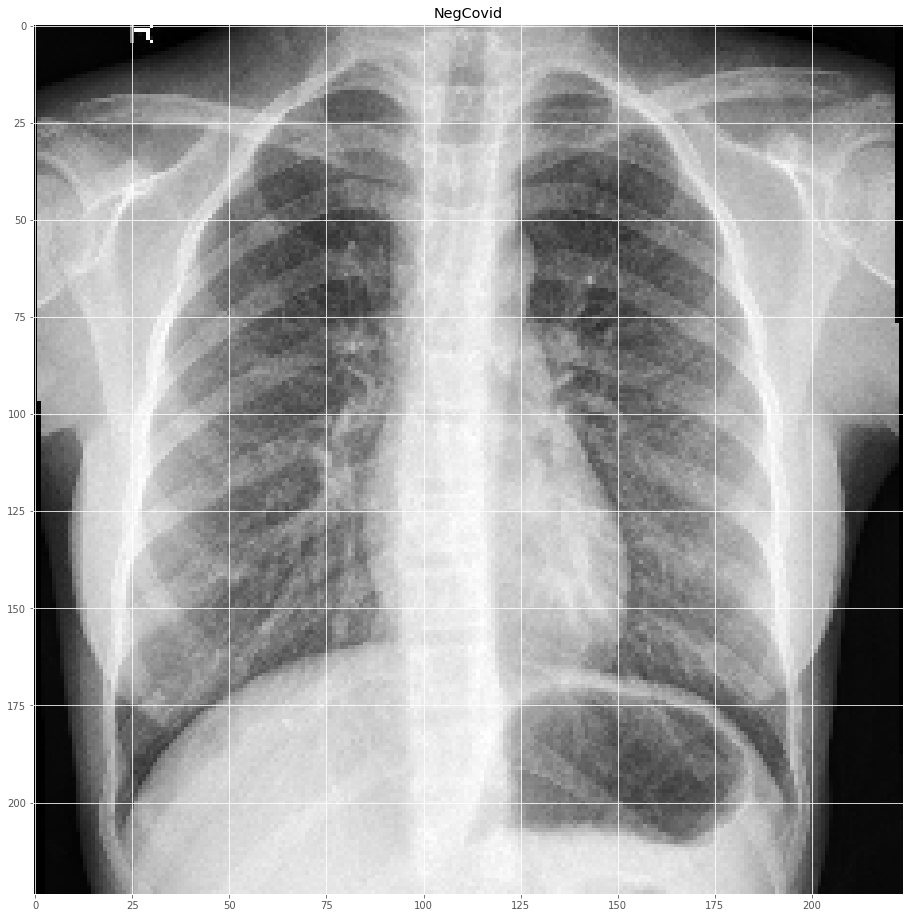

In [47]:
# Neg Ex.

url = 'https://k.top4top.io/p_1540g20th1.jpeg'

img = url_to_image(url)
img = resized = cv2.resize(img, (224,224)) 

_labels = np.array([
    'PosCovid', # class 0
    'NegCovid'])# class 1


plt.figure(figsize=(16,16))
data = convertData(img)
plt.imshow(img)
ret = model.predict(data, batch_size=BS) 
bestnum = 0.0
bestclass = 0

if  ret[0] < 0.5:
    bestclass = 0
else :
    bestclass = 1



plt.title(_labels[bestclass])
                                                  
plt.show()


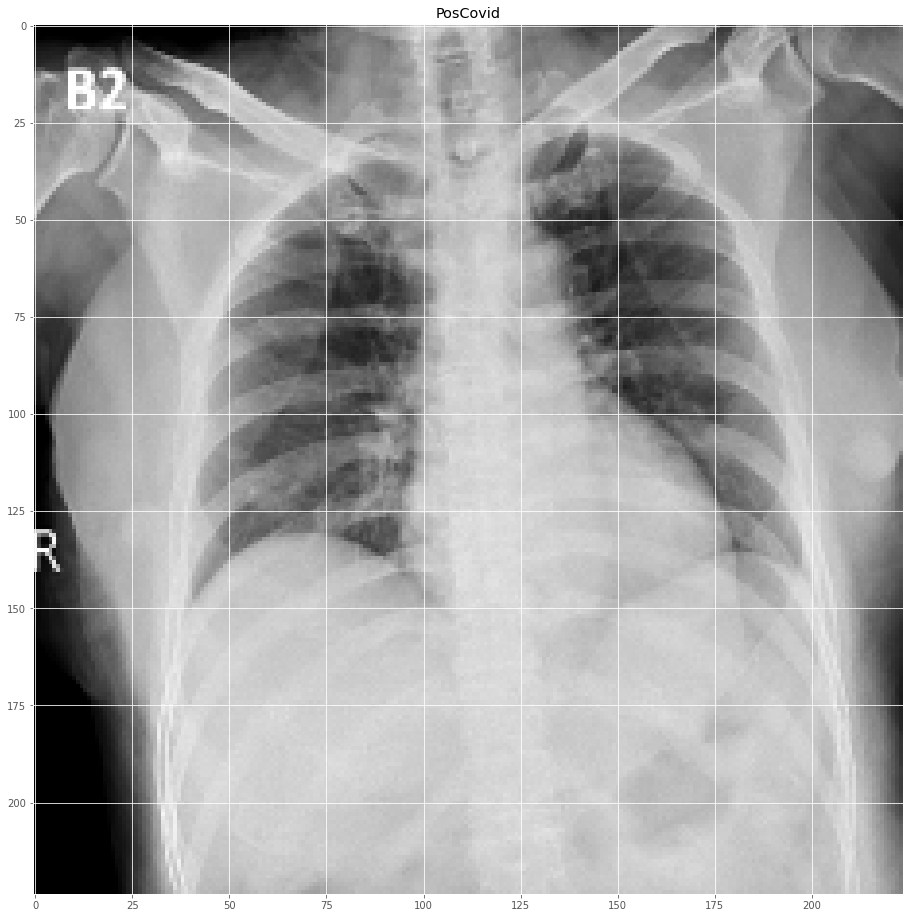

In [48]:
# Pos Ex.

url = 'https://a.top4top.io/p_15402pp5p3.png'

imgPos = url_to_image(url)
imgPos = resized = cv2.resize(imgPos, (224,224)) 

_labels = np.array([
    'PosCovid', # class 0
    'NegCovid'])# class 1


plt.figure(figsize=(16,16))
data_pos = convertData(imgPos)
plt.imshow(imgPos)
ret_pos = model.predict(data_pos, batch_size=BS) 
bestnum = 0.0
bestclass = 0

if  ret_pos[0] < 0.5:
    bestclass = 0
else :
    bestclass = 1



plt.title(_labels[bestclass])
                                                  
plt.show()


In [38]:
history1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

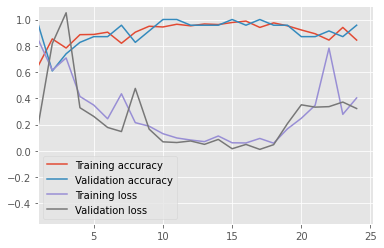

In [44]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(history1.history['acc'], label='Training accuracy')
plt.plot(history1.history['val_acc'], label='Validation accuracy')
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.xlim(left=1)
plt.ylim(top=1.1)
plt.legend()
plt.show()

In [51]:
# To Do: Fix

"""**confusion matrix**"""

from sklearn.metrics import classification_report, confusion_matrix



y_pred = model.predict_classes(testX)
yTest_original = np.argmax(testY)

print("\n \n Recall and precision for each class")
print(classification_report(yTest_original, y_pred ))


 
 Recall and precision for each class


TypeError: ignored

In [0]:
#TO DO : try this model

model2.add ( Conv2D ( 32 , ( 3 , 3 ), padding= 'same' , activation= 'relu' ,
input_shape=input_shape ))
model2.add ( Conv2D ( 32 , ( 3 , 3 ), activation= 'relu' ))
model2.add ( MaxPooling2D ( pool_size= ( 2 , 2 )))
model2.add ( Dropout ( 0.5 ))
model2.add ( Conv2D ( 64 , ( 3 , 3 ), padding= 'same' , activation= 'relu' ))
model2.add ( Conv2D ( 64 , ( 3 , 3 ), activation= 'relu' ))
model2.add ( MaxPooling2D ( pool_size= ( 2 , 2 )))
model2.add ( Dropout ( 0.5 ))
model2.add ( Conv2D ( 64 , ( 3 , 3 ), padding= 'same' , activation= 'sigmoid' ))
model2.add ( Conv2D ( 64 , ( 3 , 3 ), activation= 'sigmoid' ))
model2.add ( MaxPooling2D ( pool_size= ( 2 , 2 )))
model2.add ( Dropout ( 0.5 ))
model2.add ( Flatten ())
model2.add ( Dense ( 512 , activation= 'relu' ))
model2.add ( Dropout ( 0.4 ))
model2.add ( Dense ( nClasses , activation= 'softmax' ))

model2.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)


In [0]:
# TO DO: try this model 

img_width = 224
img_height = 224
epochs = 100

base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, 
                                             input_shape=(img_width, img_height, 3))

output = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(2, activation='softmax')(output)

model1 = tf.keras.Model(inputs=base_model.input, outputs=output)

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 